<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/inpainting_from_PCA_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

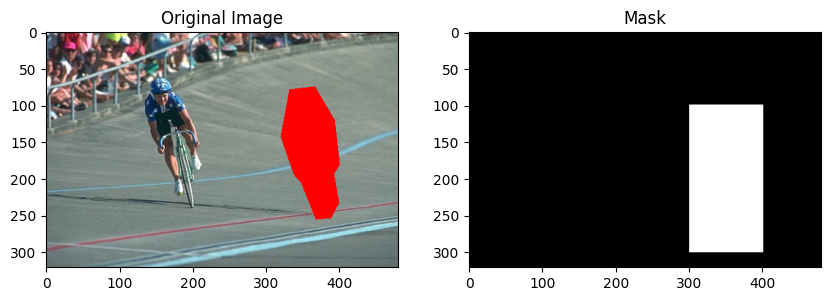

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '22.png'  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Create a mask
def create_mask(image):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.rectangle(mask, (400,100), (300, 300), 50, -1)  # Example rectangular mask
    return mask

mask = create_mask(original_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.show()
